In [1]:
import json
from pathlib import Path
from metrics import get_stats
import matplotlib.pyplot as plt

In [2]:
input_path = Path("..", "data", "evaluation.json")
fine_tune_path = Path("..", "data", "fine-tune-annotated.json")

In [3]:
data = []
fine_tune_data = []
with input_path.open("r", encoding="utf-8") as fp:
    data = json.load(fp)
with fine_tune_path.open("r", encoding="utf-8") as fp:
    fine_tune_data = json.load(fp)

In [4]:
gptft_patience_resil = []
gptft_laughter = []
gpt_patience_resil = []
gpt_laughter = []

gptft_patience_resil_score = []
gptft_laughter_score = []
gpt_patience_resil_score = []
gpt_laughter_score = []

gptft_patience_resil_score_real = []
gptft_laughter_score_real = []
gpt_patience_resil_score_real = []
gpt_laughter_score_real = []


for d in data:
    if "gptft_score" in d:
        if "Laughter" in d["prompt"]:
            gptft_laughter.append(d)
            gptft_laughter_score.append(int(d["gptft_score"]))
            gptft_laughter_score_real.append(int(d["score"]))
        else:
            gptft_patience_resil.append(d)
            gptft_patience_resil_score.append(int(d["gptft_score"]))
            gptft_patience_resil_score_real.append(int(d["score"]))
    else:
        if "Laughter" in d["prompt"]:
            gpt_laughter.append(d)
            gpt_laughter_score.append(int(d["gpt_score"]))
            gpt_laughter_score_real.append(int(d["score"]))
        else:
            gpt_patience_resil.append(d)
            gpt_patience_resil_score.append(int(d["gpt_score"]))
            gpt_patience_resil_score_real.append(int(d["score"]))

In [5]:
get_stats(gptft_patience_resil_score, gptft_patience_resil_score_real)

{'spearman_corr_stat': 0.7823688707619425,
 'spearman_corr_pval': 1.7396447743152737e-08,
 'kendall_tau_stat': 0.6926970897902481,
 'kendall_tau_pval': 3.622855399522066e-06,
 'mean_square_error': 0.5833333333333334,
 'quadratic_weighted_kappa': 0.7542262678803641}

In [6]:
get_stats(gpt_patience_resil_score, gpt_patience_resil_score_real)

{'spearman_corr_stat': 0.7450271694630662,
 'spearman_corr_pval': 1.8735266180098137e-07,
 'kendall_tau_stat': 0.6567439536419654,
 'kendall_tau_pval': 1.1256541903246469e-05,
 'mean_square_error': 0.6944444444444444,
 'quadratic_weighted_kappa': 0.7074122236671001}

In [7]:
get_stats(gptft_laughter_score, gptft_laughter_score_real)

{'spearman_corr_stat': 0.8642807153474588,
 'spearman_corr_pval': 3.748087263881425e-06,
 'kendall_tau_stat': 0.7963939624611407,
 'kendall_tau_pval': 7.190376124129798e-05,
 'mean_square_error': 1.8333333333333333,
 'quadratic_weighted_kappa': 0.6264150943396227}

In [8]:
get_stats(gpt_laughter_score, gpt_laughter_score_real)

{'spearman_corr_stat': 0.7720470276571423,
 'spearman_corr_pval': 0.00017412192474442303,
 'kendall_tau_stat': 0.6384804286944956,
 'kendall_tau_pval': 0.0009733761385142369,
 'mean_square_error': 1.0555555555555556,
 'quadratic_weighted_kappa': 0.8426862925482981}

Gold


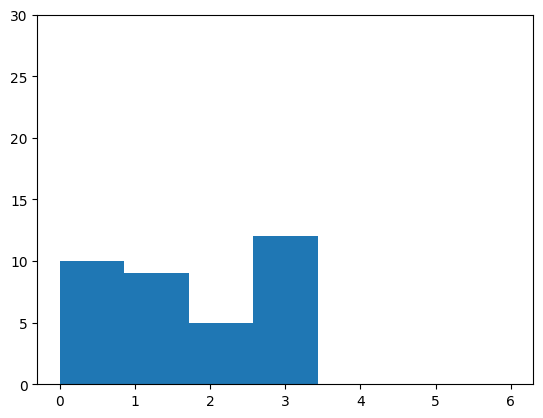

FT


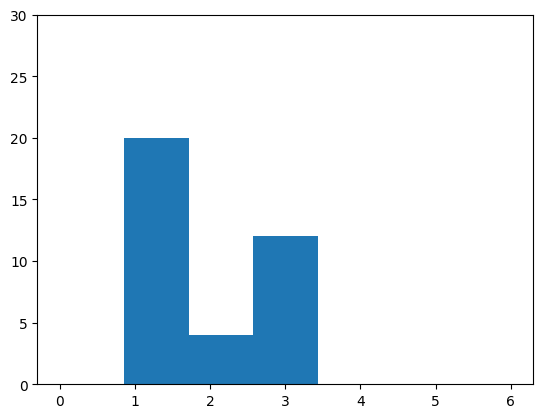

Base


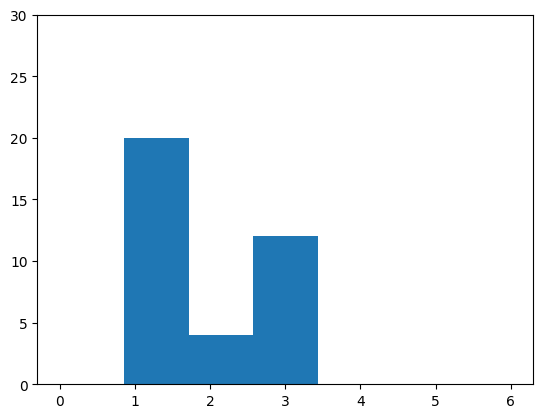

In [9]:
print("Gold")
plt.ylim(0, 30)
plt.hist(gptft_patience_resil_score_real, bins=7, range=(0, 6))
plt.show()
print("FT")
plt.ylim(0, 30)
plt.hist(gptft_patience_resil_score, bins=7, range=(0, 6))
plt.show()
print("Base")
plt.ylim(0, 30)
plt.hist(gpt_patience_resil_score, bins=7, range=(0, 6))
plt.show()

Gold


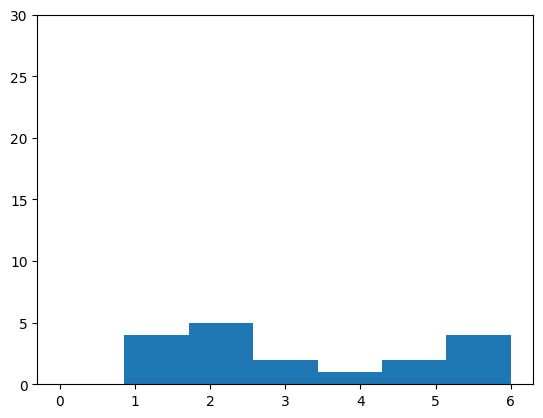

FT


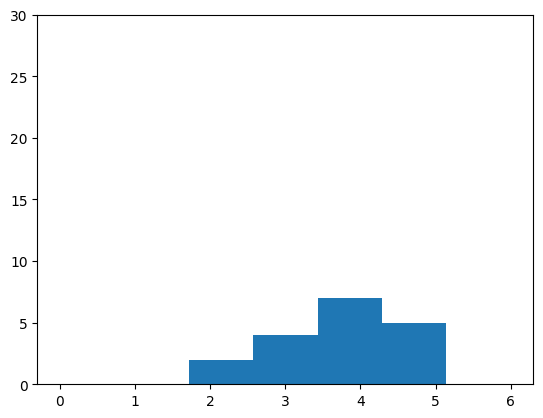

Base


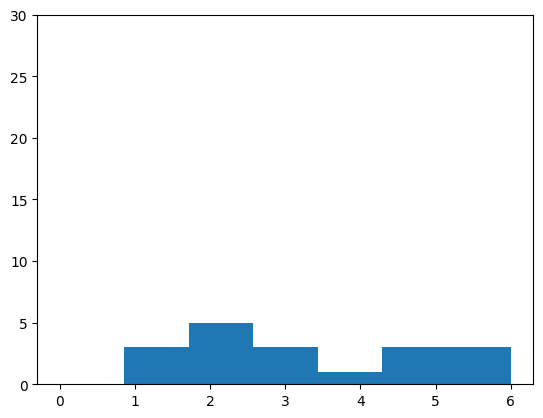

In [10]:
print("Gold")
plt.ylim(0, 30)
plt.hist(gptft_laughter_score_real, bins=7, range=(0, 6))
plt.show()
print("FT")
plt.ylim(0, 30)
plt.hist(gptft_laughter_score, bins=7, range=(0, 6))
plt.show()
print("Base")
plt.ylim(0, 30)
plt.hist(gpt_laughter_score, bins=7, range=(0, 6))
plt.show()